In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
cd=pd.read_csv(r'C:\Users\krish\Documents\UoH\datasets tableau project\conjoint_input_data.csv')
cd.head()

,flavor,price,weight,fat_free,sodium_free,gluten_free,organic,multipack,ranking
0,cheese&onion,$1.00,100g,fat_free NO,low_sodium NO,gluten_free NO,organic NO,multipack NO,11
1,salt&vinegar,$3.00,100g,fat_free NO,low_sodium YES,gluten_free YES,organic YES,multipack NO,12
2,chicken_flavored,$4.00,200g,fat_free NO,low_sodium NO,gluten_free NO,organic YES,multipack NO,9
3,salt&vinegar,$4.00,400g,fat_free YES,low_sodium YES,gluten_free NO,organic NO,multipack NO,2
4,salt&vinegar,$2.00,300g,fat_free NO,low_sodium NO,gluten_free NO,organic YES,multipack YES,8


In [9]:
cd.shape
cd.info

(16, 9)

<bound method DataFrame.info of               flavor  price weight      fat_free     sodium_free  \
0       cheese&onion  $1.00   100g   fat_free NO   low_sodium NO   
1       salt&vinegar  $3.00   100g   fat_free NO  low_sodium YES   
2   chicken_flavored  $4.00   200g   fat_free NO   low_sodium NO   
3       salt&vinegar  $4.00   400g  fat_free YES  low_sodium YES   
4       salt&vinegar  $2.00   300g   fat_free NO   low_sodium NO   
5       salt&vinegar  $1.00   200g  fat_free YES   low_sodium NO   
6   chicken_flavored  $3.00   300g  fat_free YES   low_sodium NO   
7       cheese&onion  $4.00   300g   fat_free NO  low_sodium YES   
8       cheese&onion  $2.00   400g  fat_free YES   low_sodium NO   
9     tomato_ketchup  $4.00   100g  fat_free YES   low_sodium NO   
10  chicken_flavored  $1.00   400g   fat_free NO  low_sodium YES   
11    tomato_ketchup  $2.00   200g   fat_free NO  low_sodium YES   
12    tomato_ketchup  $1.00   300g  fat_free YES  low_sodium YES   
13  chicken_flav

In [10]:
cd.dtypes

flavor         object
price          object
weight         object
fat_free       object
sodium_free    object
gluten_free    object
organic        object
multipack      object
ranking         int64
dtype: object

In [17]:
for i in cd.columns:
    print("Domain values of {} are: \n {}".format(i,cd[str(i)].unique()))

Domain values of flavor are: 
 ['cheese&onion' 'salt&vinegar' 'chicken_flavored' 'tomato_ketchup']
Domain values of price are: 
 ['$1.00' '$3.00' '$4.00' '$2.00']
Domain values of weight are: 
 ['100g' '200g' '400g' '300g']
Domain values of fat_free are: 
 ['fat_free NO' 'fat_free YES']
Domain values of sodium_free are: 
 ['low_sodium NO' 'low_sodium YES']
Domain values of gluten_free are: 
 ['gluten_free NO' 'gluten_free YES']
Domain values of organic are: 
 ['organic NO' 'organic YES']
Domain values of multipack are: 
 ['multipack NO' 'multipack YES']
Domain values of ranking are: 
 [11 12  9  2  8 13  7  4  5 16  3  6 10 15  1 14]


In [66]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
model='ranking ~ C(flavor,Sum)+C(price,Sum)+C(weight,Sum)+C(fat_free,Sum)+C(sodium_free)+C(gluten_free,Sum)+C(organic,Sum)+C(multipack,Sum)'
model_fit=smf.ols(model,data=cd).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Sat, 15 Jan 2022   Prob (F-statistic):             0.0794
Time:                        08:29:31   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [67]:
conjoint_attributes = ['flavor', 'price', 'weight', 'fat_free', 'sodium_free', 'gluten_free','organic', 'multipack']

In [134]:
#building partworths information
#calc attribute wise important level
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(cd[item])))
    level_name.append(list(np.unique(cd[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration
print("########################################################################")
print("level name:")
print(level_name)
print("npw with sum element:")
print(new_part_worth)
print("imp level:")
print(important_levels)
print("part worth:")
print(part_worth)
print("part_worth_range:")
print(part_worth_range)
print(len(part_worth))
print("important levels:")
print(important_levels)            

flavor
price
weight
fat_free
sodium_free
gluten_free
organic
multipack
########################################################################
level name:
[['cheese&onion', 'chicken_flavored', 'salt&vinegar', 'tomato_ketchup'], ['$1.00', '$2.00', '$3.00', '$4.00'], ['100g', '200g', '300g', '400g'], ['fat_free NO', 'fat_free YES'], ['low_sodium NO', 'low_sodium YES'], ['gluten_free NO', 'gluten_free YES'], ['organic NO', 'organic YES'], ['multipack NO', 'multipack YES']]
npw with sum element:
[-0.7499999999999991, 0.7499999999999991]
imp level:
{'flavor': 2, 'price': 0, 'weight': 0, 'fat_free': 1, 'sodium_free': 1, 'gluten_free': 0, 'organic': 1, 'multipack': 1}
part worth:
[[5.10702591327572e-15, 5.10702591327572e-15, 0.24999999999999223, -0.25000000000000244], [0.7500000000000016, 3.4416913763379853e-15, -4.440892098500626e-16, -0.7500000000000046], [5.000000000000002, 2.0000000000000036, -1.250000000000004, -5.750000000000002], [-1.7499999999999996, 1.7499999999999996], [-0.50000000

In [81]:
#calc important attribute 
attribute_importance = []
for i in part_worth_range:
    #print(i)
    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)

[2.33, 6.98, 50.0, 16.28, 4.65, 2.33, 10.47, 6.98]


In [112]:
part_worth_dict={}
attrib_level={}
for item,i in zip(conjoint_attributes,range(0,len(conjoint_attributes))):
    print("Attribute :",item)
    print("    Relative importance of attribute ",attribute_importance[i])
    print("    Level wise part worths-")
    for j in range(0,len(level_name[i])):
        print(i)
        print(j)
        print("          {}:{}".format(level_name[i][j],part_worth[i][j]))
        part_worth_dict[level_name[i][j]]=part_worth[i][j]
        attrib_level[item]=(level_name[i])
        #print(j)
part_worth_dict
attrib_level

    

Attribute : flavor
    Relative importance of attribute  2.33
    Level wise part worths-
0
0
          cheese&onion:5.10702591327572e-15
0
1
          chicken_flavored:5.10702591327572e-15
0
2
          salt&vinegar:0.24999999999999223
0
3
          tomato_ketchup:-0.25000000000000244
Attribute : price
    Relative importance of attribute  6.98
    Level wise part worths-
1
0
          $1.00:0.7500000000000016
1
1
          $2.00:3.4416913763379853e-15
1
2
          $3.00:-4.440892098500626e-16
1
3
          $4.00:-0.7500000000000046
Attribute : weight
    Relative importance of attribute  50.0
    Level wise part worths-
2
0
          100g:5.000000000000002
2
1
          200g:2.0000000000000036
2
2
          300g:-1.250000000000004
2
3
          400g:-5.750000000000002
Attribute : fat_free
    Relative importance of attribute  16.28
    Level wise part worths-
3
0
          fat_free NO:-1.7499999999999996
3
1
          fat_free YES:1.7499999999999996
Attribute : sodium_free
    Relat

{'cheese&onion': 5.10702591327572e-15,
 'chicken_flavored': 5.10702591327572e-15,
 'salt&vinegar': 0.24999999999999223,
 'tomato_ketchup': -0.25000000000000244,
 '$1.00': 0.7500000000000016,
 '$2.00': 3.4416913763379853e-15,
 '$3.00': -4.440892098500626e-16,
 '$4.00': -0.7500000000000046,
 '100g': 5.000000000000002,
 '200g': 2.0000000000000036,
 '300g': -1.250000000000004,
 '400g': -5.750000000000002,
 'fat_free NO': -1.7499999999999996,
 'fat_free YES': 1.7499999999999996,
 'low_sodium NO': -0.5000000000000036,
 'low_sodium YES': 0.5000000000000036,
 'gluten_free NO': 0.2500000000000009,
 'gluten_free YES': -0.2500000000000009,
 'organic NO': -1.1249999999999996,
 'organic YES': 1.1249999999999996,
 'multipack NO': -0.7499999999999991,
 'multipack YES': 0.7499999999999991}

{'flavor': ['cheese&onion',
  'chicken_flavored',
  'salt&vinegar',
  'tomato_ketchup'],
 'price': ['$1.00', '$2.00', '$3.00', '$4.00'],
 'weight': ['100g', '200g', '300g', '400g'],
 'fat_free': ['fat_free NO', 'fat_free YES'],
 'sodium_free': ['low_sodium NO', 'low_sodium YES'],
 'gluten_free': ['gluten_free NO', 'gluten_free YES'],
 'organic': ['organic NO', 'organic YES'],
 'multipack': ['multipack NO', 'multipack YES']}

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Relative importance of attributes')

Text(0.5, 0, 'Attributes')

Text(0, 0.5, 'Importance')

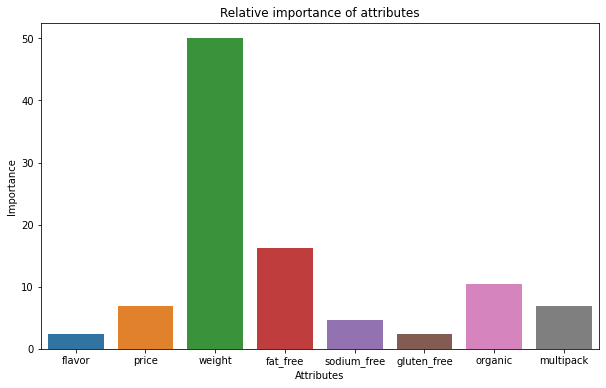

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x=conjoint_attributes,y=attribute_importance)
plt.title('Relative importance of attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')

In [130]:
# utility calculation

utility = []
for i in range(cd.shape[0]):
    score = part_worth_dict[cd['flavor'][i]]+ part_worth_dict[cd['price'][i]]+    part_worth_dict[cd['weight'][i]]+part_worth_dict[cd['fat_free'][i]]+    part_worth_dict[cd['sodium_free'][i]]+part_worth_dict[cd['gluten_free'][i]]+    part_worth_dict[cd['organic'][i]]+part_worth_dict[cd['multipack'][i]]
    utility.append(score)
    
cd['utility'] = utility
utility

[1.8750000000000075,
 4.124999999999997,
 -0.3749999999999978,
 -5.625000000000008,
 -1.125000000000012,
 3.6249999999999916,
 -2.1250000000000027,
 -3.875000000000001,
 -4.3749999999999964,
 6.8749999999999885,
 -4.624999999999994,
 -1.6249999999999911,
 2.1249999999999996,
 7.125000000000015,
 -8.375000000000007,
 6.37500000000001]

<BarContainer object of 16 artists>

Text(0.5, 0, 'row_number_of_entry')

Text(0, 0.5, 'Utility')

Text(0.5, 1.0, 'Utility score for the given combinations')

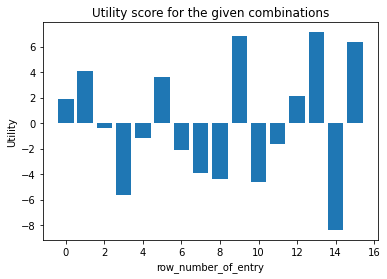

In [131]:
plt.bar(range(0,len(utility)),utility)
plt.xlabel('row_number_of_entry')
plt.ylabel('Utility')
plt.title('Utility score for the given combinations')

In [132]:
# Max utility 
print("The profile that has the highest utility score :",'\n', cd.iloc[np.argmax(utility)])

The profile that has the highest utility score : 
 flavor         chicken_flavored
price                     $2.00
weight                     100g
fat_free           fat_free YES
sodium_free      low_sodium YES
gluten_free      gluten_free NO
organic              organic NO
multipack         multipack YES
ranking                      15
utility                   7.125
Name: 13, dtype: object


In [127]:
for i,j in zip(attrib_level.keys(),range(0,len(conjoint_attributes))):
    #print(i)
    #level_name[j]
    print("Preferred level in the attribute {} is :: {}".format(i,level_name[j][important_levels[i]]))

Preferred level in the attribute flavor is :: salt&vinegar
Preferred level in the attribute price is :: $1.00
Preferred level in the attribute weight is :: 100g
Preferred level in the attribute fat_free is :: fat_free YES
Preferred level in the attribute sodium_free is :: low_sodium YES
Preferred level in the attribute gluten_free is :: gluten_free NO
Preferred level in the attribute organic is :: organic YES
Preferred level in the attribute multipack is :: multipack YES
